In [32]:
import pandas as pd
import numpy as np

# ***Download and load dataset(Dont want to change anything)***

In [ ]:
!git clone https://github.com/Dinith132/steel-industry-energy-consumption.git

fatal: destination path 'steel-industry-energy-consumption' already exists and is not an empty directory.


In [61]:
df=pd.read_csv("/content/steel-industry-energy-consumption/steel_industry_data_preprocessed_v1.csv")

In [62]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
df = df.resample('H', on='date').agg({
    'Usage_kWh': 'mean',
    'Lagging_Current_Reactive.Power_kVarh': 'mean',
    'Leading_Current_Reactive_Power_kVarh': 'mean',
    'CO2(tCO2)': 'mean',
    'Lagging_Current_Power_Factor': 'mean',
    'Leading_Current_Power_Factor': 'mean',
    'NSM': 'mean',
    'WeekStatus': 'first',
    'Load_Type': 'first'
})

/tmp/ipython-input-63-1672066723.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H', on='date').agg({


# ***Prepro from Here***

In [64]:
df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00     3.4575                                3.5375   
2018-01-01 01:00:00     3.5025                                3.9400   
2018-01-01 02:00:00     3.5300                                4.1675   
2018-01-01 03:00:00     3.4550                                4.0500   
2018-01-01 04:00:00     3.6175                                4.4100   

                     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                   
2018-01-01 00:00:00                                   0.0        0.0   
2018-01-01 01:00:00                                   0.0        0.0   
2018-01-01 02:00:00                                   0.0        0.0   
2018-01-01 03:00:00                                   0.0        0.0   
2018-01-01 04:00:00                                   0.0        0.0   

                     Lagging_Current_Power_Factor  \
date                                                
2018-01-01 00:00:00                       70.1400   
2018-01-01 01:00:00                       66.5475   
2018-01-01 02:00:00                       64.7400   
2018-01-01 03:00:00                       65.0675   
2018-01-01 04:00:00                       63.5175   

                     Leading_Current_Power_Factor      NSM  WeekStatus  \
date                                                                     
2018-01-01 00:00:00                         100.0   1350.0         0.0   
2018-01-01 01:00:00                         100.0   4950.0         0.0   
2018-01-01 02:00:00                         100.0   8550.0         0.0   
2018-01-01 03:00:00                         100.0  12150.0         0.0   
2018-01-01 04:00:00                         100.0  15750.0         0.0   

                     Load_Type  
date                            
2018-01-01 00:00:00        0.0  
2018-01-01 01:00:00        0.0  
2018-01-01 02:00:00        0.0  
2018-01-01 03:00:00        0.0  
2018-01-01 04:00:00        0.0

In [67]:
fet=df.columns

In [68]:
fet

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type'],
      dtype='object')

In [43]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  8760.000000                           8760.000000   
mean     27.386892                             13.035384   
std      31.352647                             14.524748   
min       2.465000                              0.000000   
25%       3.247500                              3.222500   
50%       4.742500                              5.292500   
75%      50.960000                             23.105000   
max     138.305000                             72.162500   

       Leading_Current_Reactive_Power_kVarh    CO2(tCO2)  \
count                           8760.000000  8760.000000   
mean                               3.870949     0.011524   
std                                6.729335     0.015073   
min                                0.000000     0.000000   
25%                                0.000000     0.000000   
50%                                0.000000     0.000000   
75%                                5.356875     0.022500   
max                               27.605000     0.065000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                   8760.000000                   8760.000000   
mean                      80.578056                     84.367870   
std                       18.334134                     28.134642   
min                       37.297500                     12.637500   
25%                       64.191250                     81.211250   
50%                       87.962500                    100.000000   
75%                       96.378125                    100.000000   
max                      100.000000                    100.000000   

                NSM   WeekStatus    Load_Type  
count   8760.000000  8760.000000  8760.000000  
mean   42750.000000     0.284932     0.760959  
std    24921.294078     0.451408     0.857560  
min     1350.000000     0.000000     0.000000  
25%    22050.000000     0.000000     0.000000  
50%    42750.000000     0.000000     0.000000  
75%    63450.000000     1.000000     2.000000  
max    84150.000000     1.000000     2.000000

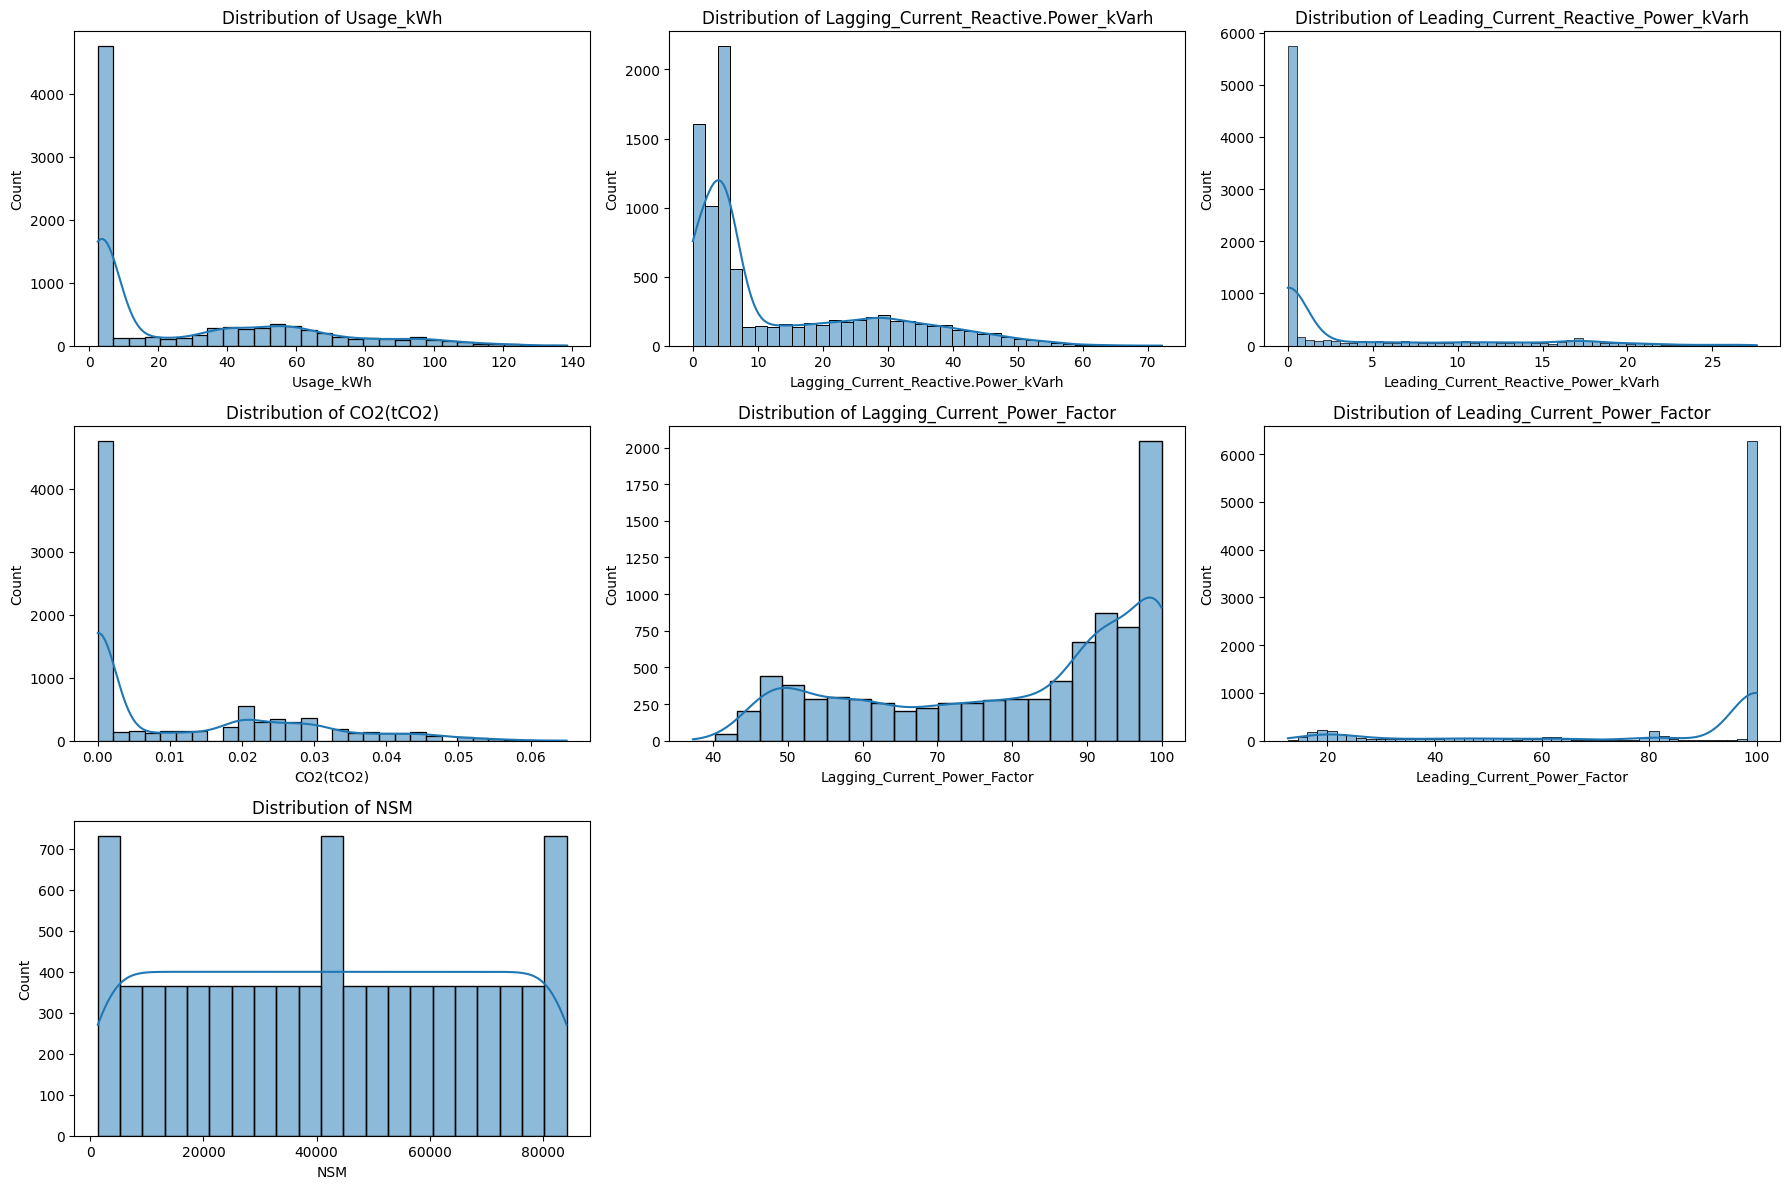

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# 3 plots per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


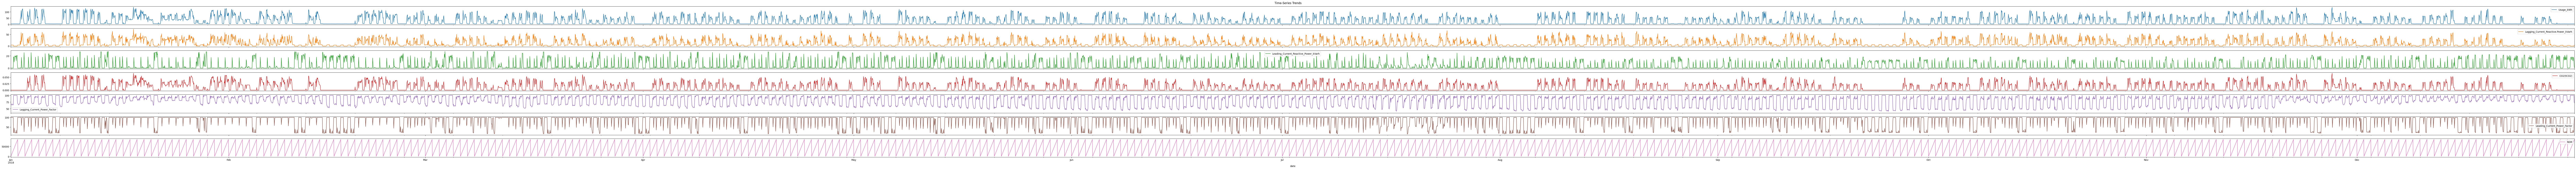

In [45]:
df[numeric_cols].plot(subplots=True, figsize=(150, 10), title="Time-Series Trends")
plt.tight_layout()
plt.show()


In [46]:
log_df=df.copy()
numeric_cols_log = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

# Apply log1p to each column and add new columns with `_log` suffix
for col in numeric_cols_log:
    log_df[col] = np.log1p(df[col])

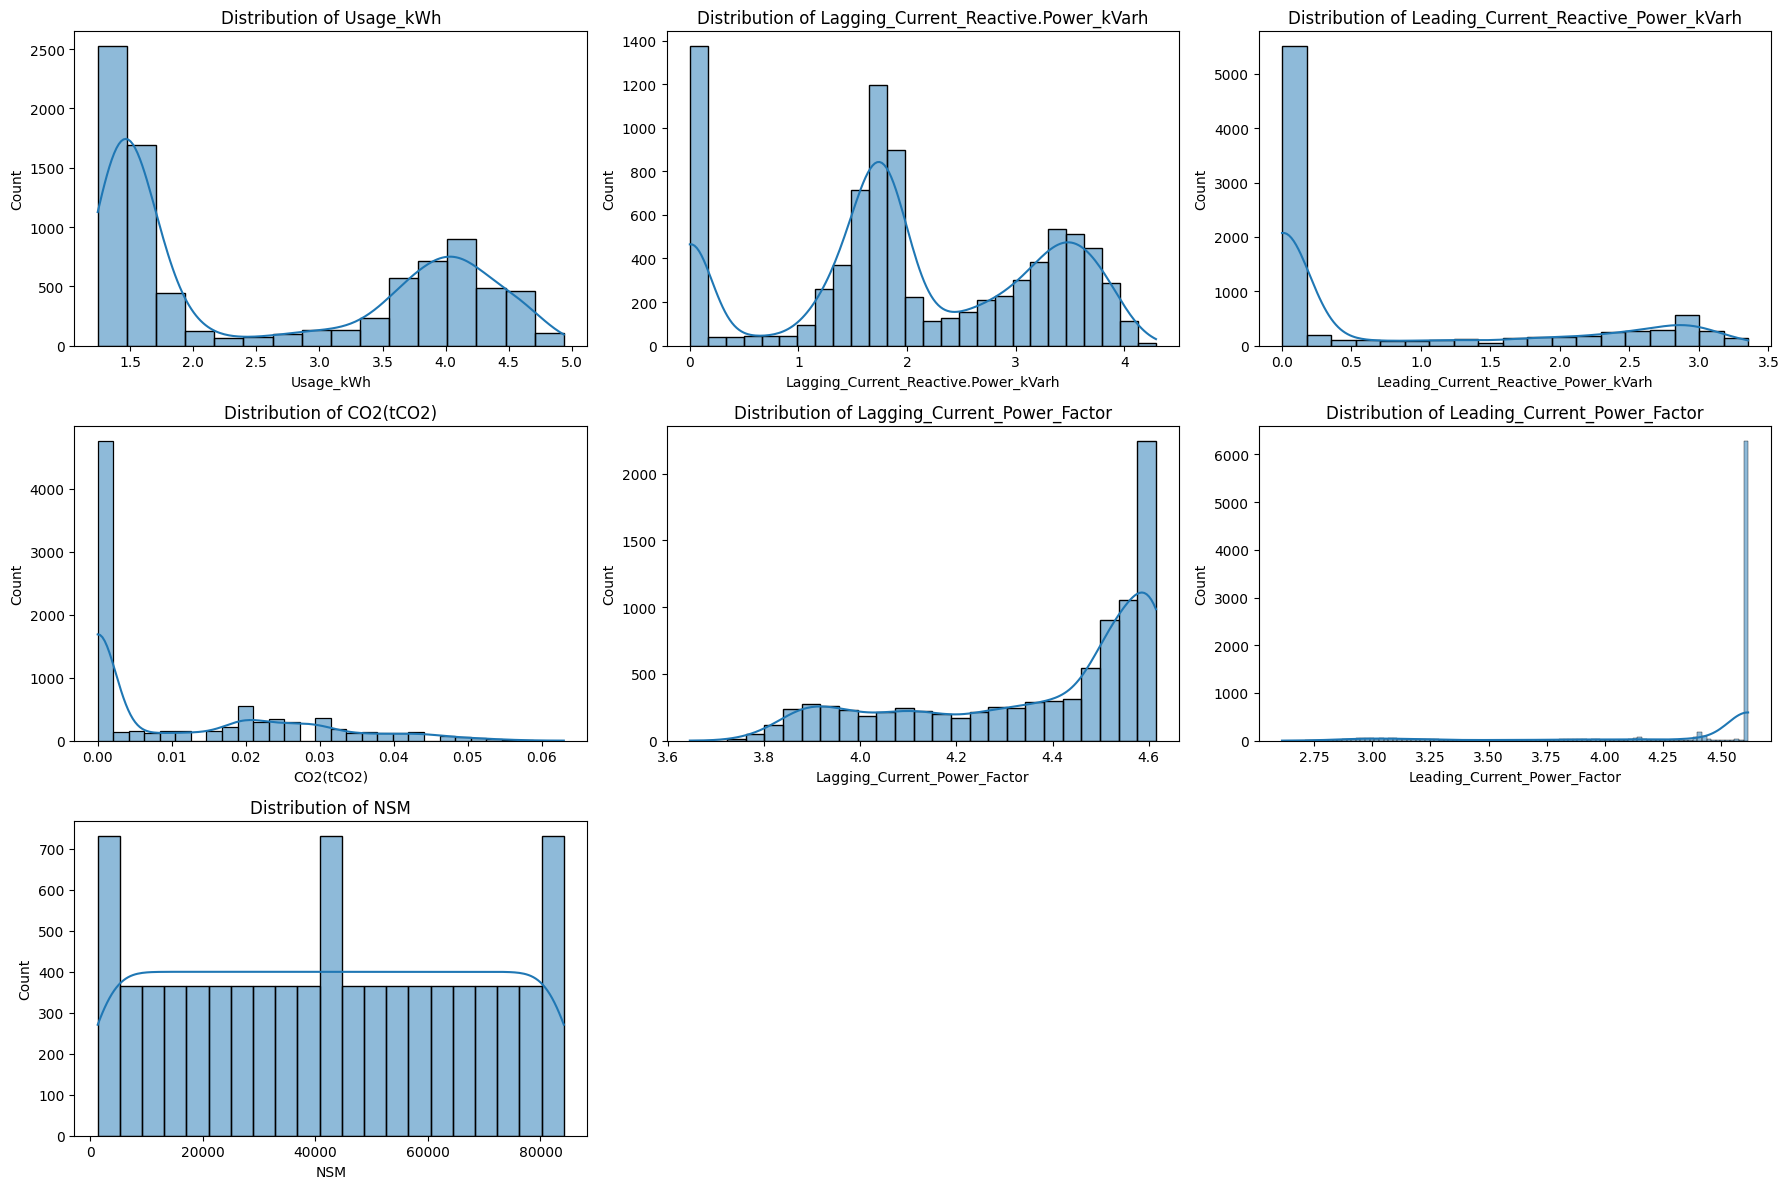

In [47]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(log_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

min max

In [48]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [49]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(log_df)

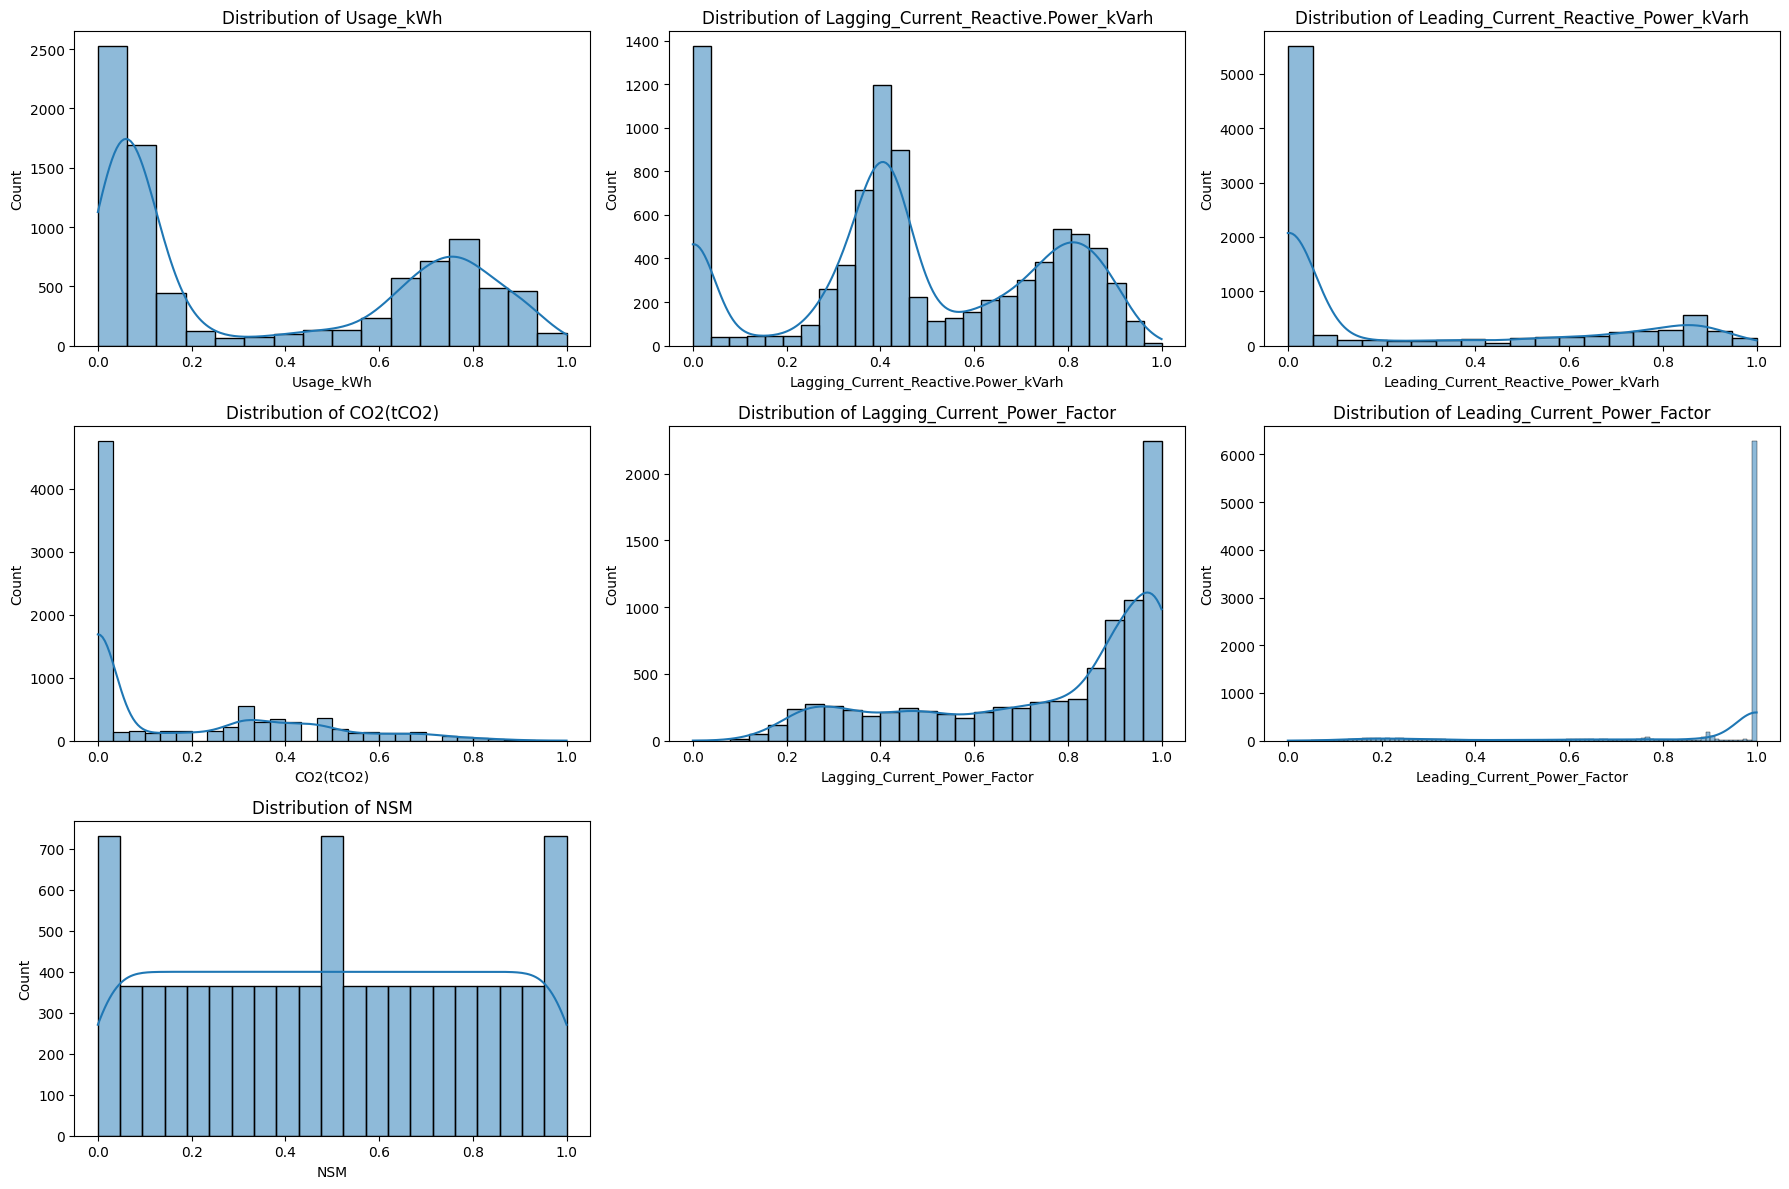

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# Convert scaled_data back to DataFrame for plotting with column names
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# 3 plots per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(scaled_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

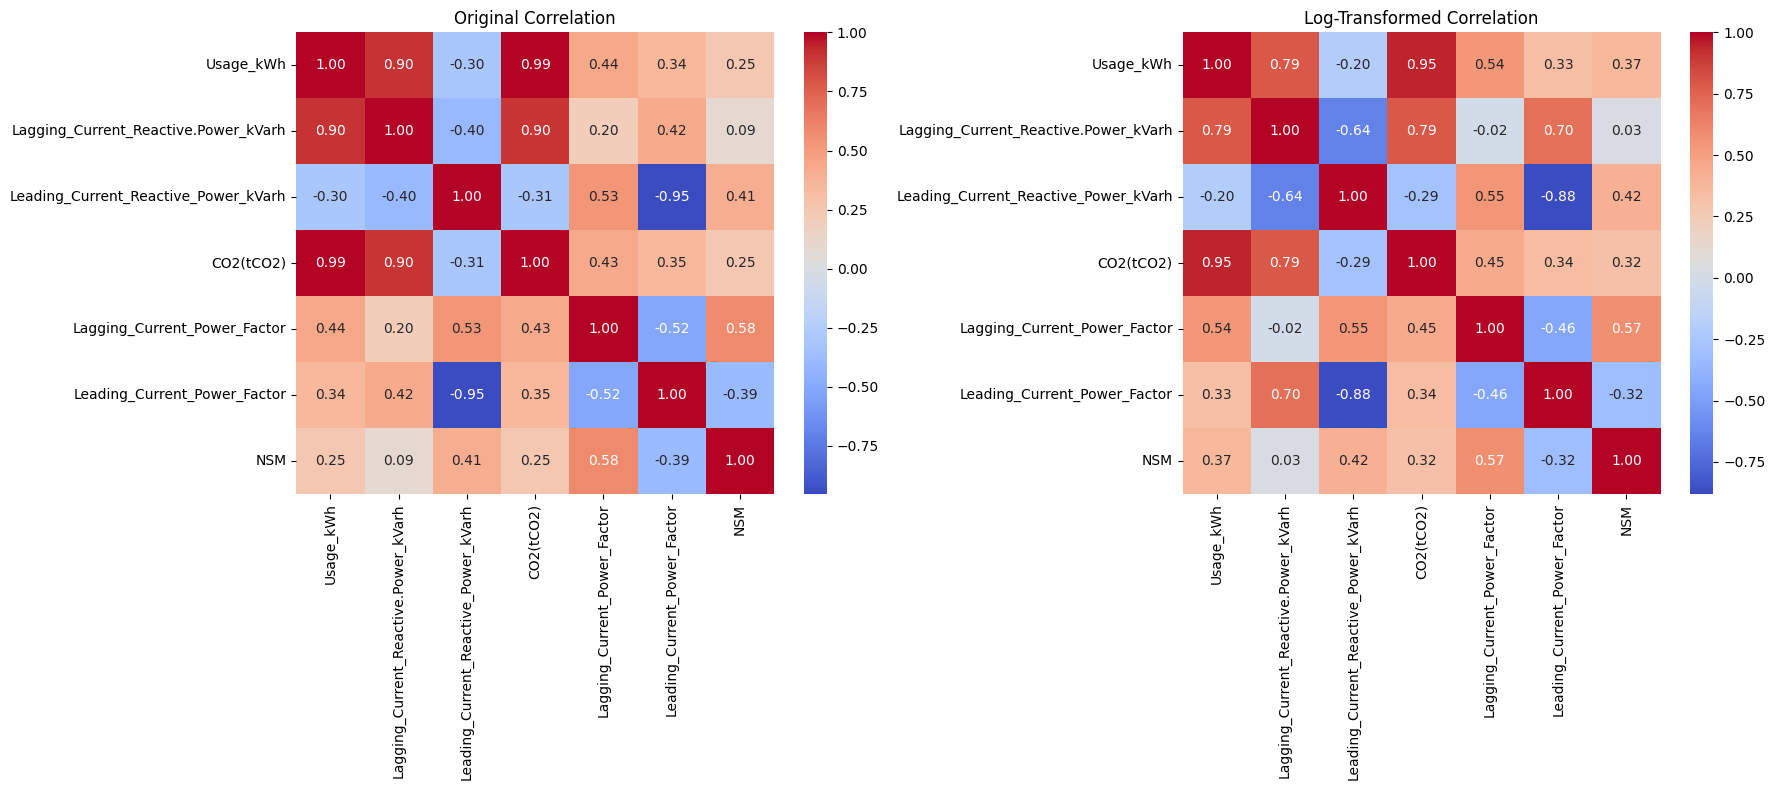

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a log-transformed DataFrame
log_df = df[numeric_cols].apply(np.log1p)

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Original correlation heatmap
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Original Correlation')

# Log-transformed correlation heatmap
sns.heatmap(log_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Log-Transformed Correlation')


plt.tight_layout()
plt.show()

In [52]:
scaled_df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0   0.068186                              0.352315   
1   0.070905                              0.372114   
2   0.072554                              0.382602   
3   0.068034                              0.377244   
4   0.077733                              0.393285   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                      0.638592                           1.0  0.000000   
1                      0.585156                           1.0  0.043478   
2                      0.557186                           1.0  0.086957   
3                      0.562310                           1.0  0.130435   
4                      0.537829                           1.0  0.173913   

   WeekStatus  Load_Type  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0

# ***dataset saving***

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
save_karanna_oni_path="/content/drive/MyDrive/Shared-Colab-Storage/with_down/foldername"    # save karanna oni than folder eke deepn(csv eke nama methana denna oni na)
os.makedirs(save_karanna_oni_path, exist_ok=True)

scaled_df.to_csv(f"{save_karanna_oni_path}/log_data.csv", index=False)   # Methana csv eke nama (ex:log_data) deepan. log_data wenuwata